# Advanced Classification Hackathon Challenge

© Explore Data Science Academy

## Honour Code

I **Boitemogelo Tagane**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

## 1. Introduction

South Africa, also known as the Rainbow Nation, is one of the most diverse countries in the world, full of rich culture and a variety of unique and beautiful ethnic groups. It has a well common known history of seperation and indifference, where various ethnic groups were viewed as inferior to others. However, these ethnic groups saw themselves as equals to every other ethnic group and race, and fought for the democracy and equality that they deserved. The birth of this democracy resulted in a state where all races and colours are accepted for who they are and not what they look like. This democracy did not only accept people of all colour and ethnicity, but sanctioned this equality through the adoption and officialising of the languages of its residents. 

## 2. Problem Statement

To celebrate the democracy, I have been tasked with the development of a model that can be able to take text which is in any of South Africa's 11 Official languages and identify which language the text is in.

## 3. Importing Packages

In [229]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing packages for data cleaning and feature engineering
import string
import re

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer
import time


# Packages for training models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


### Brief Analysis

In this section we have a cell that displays all the necessary modules, packages and libraries that are all fundamental throughout the various steps of this document. These imports and their capabilities will assist the Data Scientist with his/her end goal, which is to create a reliable machine learning model.

## 4. Loading the Data

In [230]:
# Loading the train and test dataset 
train = pd.read_csv("train_set.csv")
test = pd.read_csv("test_set.csv")

### Brief Analysis

This section inloves loading the data that will be used to train and test the models that have been built by the Data Scientist.

## Exploratory Data Analysis

In [232]:
train.shape

(33000, 2)

In [188]:
#Looking at the data by showing first 5 rows in train data
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [189]:
#Looking at the data by showing first 5 rows in test data
test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [190]:
#Looking at the data types in train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [191]:
#Checking for null values in train data
train.isnull().sum()

lang_id    0
text       0
dtype: int64

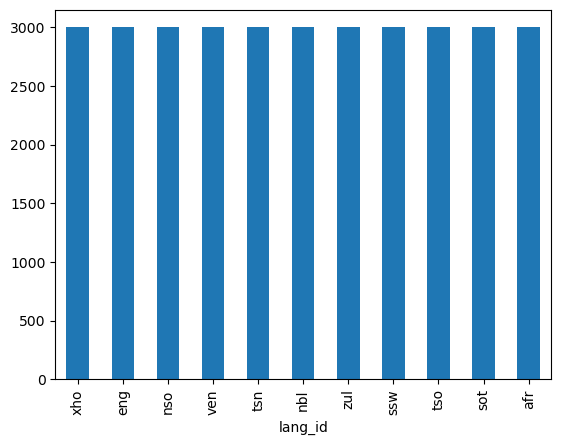

In [192]:
#Checking the values counts in the train dataset
train['lang_id'].value_counts().plot(kind = 'bar')
plt.show()

### Brief Analysis

In this section we observe and explore the data. As we can see the data has two colums, which are **lang_id** and **text**. However, the **lang_id** column is not in the test dataset. Furthermore, our data types are **objects**. In addition, our data does not contain any null values. Lastly, with the visual above, we can conclude that the values or rows of the data are evenly distributed among the types of **land_id**. The languages and their id's are as follows:
- **xho** : IsiXhosa
- **eng** : English
- **nso** : Northern Sotho
- **ven** : TshiVenda
- **tsn** : SeTswana
- **nbl** : IsiNdebele
- **zul** : IsiZulu
- **ssw** : IsiSwati
- **tso** : XiTsonga
- **sot** : Southern Sotho
- **afr** : Afrikaans

## 5. Data Cleaning

In [195]:
# Create an empty list to store the processed data
df_train = []

# Iterate over each row in the 'train' DataFrame
for i, row in train.iterrows():
    
    # Split the 'text' column using the '|||' delimiter
    for post in row['text'].split('|||'):
        
        # Append a new list with 'lang_id' and the split 'text' to the df_train list
        df_train.append([row['lang_id'], post])

# Create a new DataFrame from the processed data with columns 'lang_id' and 'text'
df_train = pd.DataFrame(df_train, columns=['lang_id', 'text'])

In [197]:
# Define a function named 'remove_html_tags' that takes 'text' as a parameter
def remove_html_tags(text):
    """Remove HTML tags from the text."""
    
    # Use the re.sub function to replace HTML tags with a space in the 'text'
    clean_text = re.sub('<.*?>', ' ', text)
    
    # Return the cleaned text without HTML tags
    return clean_text

In [198]:
#Applying the function to the data
df_train['text'] = df_train['text'].apply(remove_html_tags)

In [199]:
# Define a function named 'remove_newline_chars' that takes 'text' as a parameter
def remove_newline_chars(text):
    """Remove newline characters from the text."""
    
    # Use the re.sub function to replace newline characters with a space in the 'text'
    clean_text = re.sub("\n", " ", text)
    
    # Return the cleaned text without newline characters
    return clean_text

In [200]:
#Applying the function to the data
df_train['text'] = df_train['text'].apply(remove_newline_chars)

In [201]:
# Define a function named 'remove_numbers' that takes 'text' as a parameter
def remove_numbers(text):
    """Remove numbers from the text."""
    
    # Use the re.sub function to replace sequences of digits with a space in the 'text'
    clean_text = re.sub(r'\d+', ' ', text)
    
    # Return the cleaned text without numbers
    return clean_text

In [202]:
#Applying the function to the data
df_train['text'] = df_train['text'].apply(remove_numbers)

In [203]:
# Define a function named 'remove_extra_spaces' that takes 'text' as a parameter
def remove_extra_spaces(text):
    """Remove extra spaces from the text."""
    
    # Use the 'split()' method to break the text into words, and 'join()' to reconstruct it with single spaces
    clean_text = ' '.join(text.split())
    
    # Return the cleaned text without extra spaces
    return clean_text

In [204]:
#Applying the function to the data
df_train['text'] = df_train['text'].apply(remove_extra_spaces)

In [205]:
# Define a function named 'convert_to_lowercase' that takes 'text' as a parameter
def convert_to_lowercase(text):
    """Convert the text to lowercase."""
    
    # Use the 'lower()' method to convert all characters in 'text' to lowercase
    clean_text = text.lower()
    
    # Return the cleaned text in lowercase
    return clean_text

In [206]:
#Applying the function to the data
df_train['text'] = df_train['text'].apply(convert_to_lowercase)

In [207]:
# Replace ".txt" with " text file" in the 'text' column of the DataFrame 'df_train'
df_train["text"] = df_train["text"].str.replace(".txt", " text file")

### Brief Analysis

In this section we have undergone various steps to clean the provided data. We created varioius functions that have their own roles in ensuring that the data that we will use will certify the reliability of our model once we train it. 

## 6. Feature Engineering

In [208]:
# Assign the 'text' column to the variable X
X = df_train['text']

# Assign the 'lang_id' column to the variable y
y = df_train['lang_id']

In [209]:
# Split the data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10)

## 7. Modeling and Model Performance

### Logistic Regression

In [211]:
# Logistic Regression Model Initialization
lr = LogisticRegression(random_state=42, multi_class='ovr', n_jobs=1, C=1e5, max_iter=4000)

# Pipeline Initialization
clf_lr = Pipeline([('tfidf', TfidfVectorizer(min_df=1, max_df=0.9, ngram_range=(1, 2))), ('clf', lr)])

# Fitting the Model
start_time = time.time()
clf_lr.fit(X_train, y_train)
run_time = time.time() - start_time

# Making Predictions
lr_pred = clf_lr.predict(X_val)

In [212]:
#Lr metrics
F1_Macro_Lr=metrics.f1_score(y_val,lr_pred,average='macro')
print("F1 Macro:")
print(F1_Macro_Lr)
F1_Accuracy_Lr=metrics.f1_score(y_val, lr_pred,average='micro')
print("F1 Accuracy:")
print(F1_Accuracy_Lr)
F1_Weighted_Lr=metrics.f1_score(y_val,lr_pred,average='weighted')
print("F1 Weighted:")
print(F1_Weighted_Lr)
Execution_Time_Lr=run_time
print("Executuion Time:")
print(Execution_Time_Lr)

F1 Macro:
0.9981856238480898
F1 Accuracy:
0.9981818181818182
F1 Weighted:
0.9981805714944185
Executuion Time:
141.82156491279602


### Decision Tree

In [215]:

# Decision Tree Model Initialization
dt = DecisionTreeClassifier()

# Pipeline Initialization
clf_dt = Pipeline([('tfidf', TfidfVectorizer(min_df=1, max_df=0.9, ngram_range=(1, 2))), ('clf', dt)])

# Fitting the Model
start_time = time.time()
clf_dt.fit(X_train, y_train)
run_time = time.time() - start_time

# Making Predictions
dt_pred = clf_dt.predict(X_val)

In [216]:
F1_Macro_dt=metrics.f1_score(y_val,dt_pred,average='macro')
print("F1 Macro:")
print(F1_Macro_dt)
F1_Accuracy_dt=metrics.f1_score(y_val, dt_pred,average='micro')
print("F1 Accuracy:")
print(F1_Accuracy_dt)
F1_Weighted_dt=metrics.f1_score(y_val,dt_pred,average='weighted')
print("F1 Weighted:")
print(F1_Weighted_dt)
Execution_Time_dt=run_time
print("Executuion Time:")
print(Execution_Time_dt)

F1 Macro:
0.9476014297577803
F1 Accuracy:
0.9478787878787879
F1 Weighted:
0.9477315191868815
Executuion Time:
58.22195625305176


### Support Vector Machine

In [218]:
# Linear Support Vector Machine Initialization
svm = LinearSVC(random_state=42, max_iter=4000)

# Pipeline Initialization
clf_svm = Pipeline([('tfidf', TfidfVectorizer(min_df=1, max_df=0.9, ngram_range=(1, 2))), ('clf', svm)])

# Fitting the Model
start_time = time.time()
clf_svm.fit(X_train, y_train)
run_time = time.time() - start_time

# Making Predictions
svm_pred = clf_svm.predict(X_val)

In [219]:
F1_Macro_svm=metrics.f1_score(y_val,svm_pred,average='macro')
print("F1 Macro:")
print(F1_Macro_svm)
F1_Accuracy_svm=metrics.f1_score(y_val, svm_pred,average='micro')
print("F1 Accuracy:")
print(F1_Accuracy_svm)
F1_Weighted_svm=metrics.f1_score(y_val,svm_pred,average='weighted')
print("F1 Weighted:")
print(F1_Weighted_svm)
Execution_Time_svm=run_time
print("Executuion Time:")
print(Execution_Time_svm)

F1 Macro:
0.9981856238480898
F1 Accuracy:
0.9981818181818182
F1 Weighted:
0.9981805714944185
Executuion Time:
7.150238513946533


### Random Forest Classifier

In [221]:

# Random Forest Classifier Initialization
rf = RandomForestClassifier(random_state=42, n_jobs=1, n_estimators=100)

# Pipeline Initialization
clf_rf = Pipeline([('tfidf', TfidfVectorizer(min_df=1, max_df=0.9, ngram_range=(1, 2))), ('clf', rf)])

# Fitting the Model
start_time = time.time()
clf_rf.fit(X_train, y_train)
run_time = time.time() - start_time

# Making Predictions
rf_pred = clf_rf.predict(X_val)

In [222]:
F1_Macro_rf=metrics.f1_score(y_val,rf_pred,average='macro')
print("F1 Macro:")
print(F1_Macro_rf)
F1_Accuracy_rf=metrics.f1_score(y_val, rf_pred,average='micro')
print("F1 Accuracy:")
print(F1_Accuracy_rf)
F1_Weighted_rf=metrics.f1_score(y_val,rf_pred,average='weighted')
print("F1 Weighted:")
print(F1_Weighted_rf)
Execution_Time_rf=run_time
print("Executuion Time:")
print(Execution_Time_rf)

F1 Macro:
0.991779410615313
F1 Accuracy:
0.9918181818181818
F1 Weighted:
0.9918039253354913
Executuion Time:
644.7235028743744


### Naive Bayes Model

In [224]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes Model Initialization
nb = MultinomialNB()

# Pipeline Initialization
clf_nb = Pipeline([('tfidf', TfidfVectorizer(min_df=1, max_df=0.9, ngram_range=(1, 2))), ('clf', nb)])

# Fitting the Model
start_time = time.time()
clf_nb.fit(X_train, y_train)
run_time = time.time() - start_time

# Making Predictions
nb_pred = clf_nb.predict(X_val)

In [225]:
F1_Macro_nb=metrics.f1_score(y_val,nb_pred,average='macro')
print("F1 Macro:")
print(F1_Macro_nb)
F1_Accuracy_nb=metrics.f1_score(y_val, nb_pred,average='micro')
print("F1 Accuracy:")
print(F1_Accuracy_nb)
F1_Weighted_nb=metrics.f1_score(y_val,nb_pred,average='weighted')
print("F1 Weighted:")
print(F1_Weighted_nb)
Execution_Time_nb=run_time
print("Executuion Time:")
print(Execution_Time_nb)

F1 Macro:
0.9987898851305758
F1 Accuracy:
0.9987878787878788
F1 Weighted:
0.9987882918053705
Executuion Time:
4.054364919662476


### Brief Analysis

We have covered the 3 sections, which are **Feature Engineering**, **Model Building** and **Model Evaluation**. We have provided also provided 5 different models that have been tested. As you can see above, the best performing model is the **Naive Bayes Model**.

## Conclusion

We have successfully explored the data and conducted data cleaning as well. With data cleaning we have prepared the data to be used for modelling. Models were built and trained using our train data set. Once we trained the models, we tested them using our test data to see how they perform, and thus confirming their relibality with performance metrics